<a href="https://colab.research.google.com/github/joembolinas/My-Jupyter-Notebook/blob/master/Introduction_to_Computer_Networking_Visualized.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Visualization Techniques

This notebook provides a comprehensive overview of data visualization techniques for computer networking concepts. It aims to help beginners understand fundamental networking principles through visual representations.

## 1. Setting Up Network Visualization Tools

We'll start by installing and importing all the necessary libraries for our network visualizations.

In [19]:
!pip install matplotlib networkx plotly pandas ipywidgets scapy pyshark

In [21]:
# Install required packages (uncomment if needed)
# !pip install matplotlib networkx plotly pandas ipywidgets scapy pyshark

# Import basic visualization and data libraries
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

# Set plot styling
plt.style.use('ggplot')
%matplotlib inline

# Configure notebook settings
plt.rcParams['figure.figsize'] = (12, 8)


## 2. Creating Basic Network Diagrams with Python

NetworkX is a powerful library for creating, manipulating, and visualizing network graphs. We'll use it to represent common network topologies.

In [32]:
# Function to create a star topology
def create_star_network(n_nodes=8):
    G = nx.star_graph(n_nodes)
    return G

# Function to create a bus topology
def create_bus_network(n_nodes=8):
    G = nx.Graph()
    # Add nodes
    for i in range(n_nodes):
        G.add_node(i)
    # Connect each node to the "bus"
    for i in range(n_nodes-1):
        G.add_edge(i, i+1)
    return G

# Function to create a ring topology
def create_ring_network(n_nodes=8):
    G = nx.cycle_graph(n_nodes)
    return G

# Function to create a mesh topology
def create_mesh_network(n_nodes=5):
    G = nx.complete_graph(n_nodes)
    return G

# Function to visualize network with custom colors
def visualize_network(G, title, node_color='skyblue', edge_color='gray',
                     node_size=1000, layout=nx.spring_layout):
    plt.figure(figsize=(10, 7))
    pos = layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_color,
            edge_color=edge_color, node_size=node_size, font_weight='bold')
    plt.title(title, fontsize=16)
    plt.show()

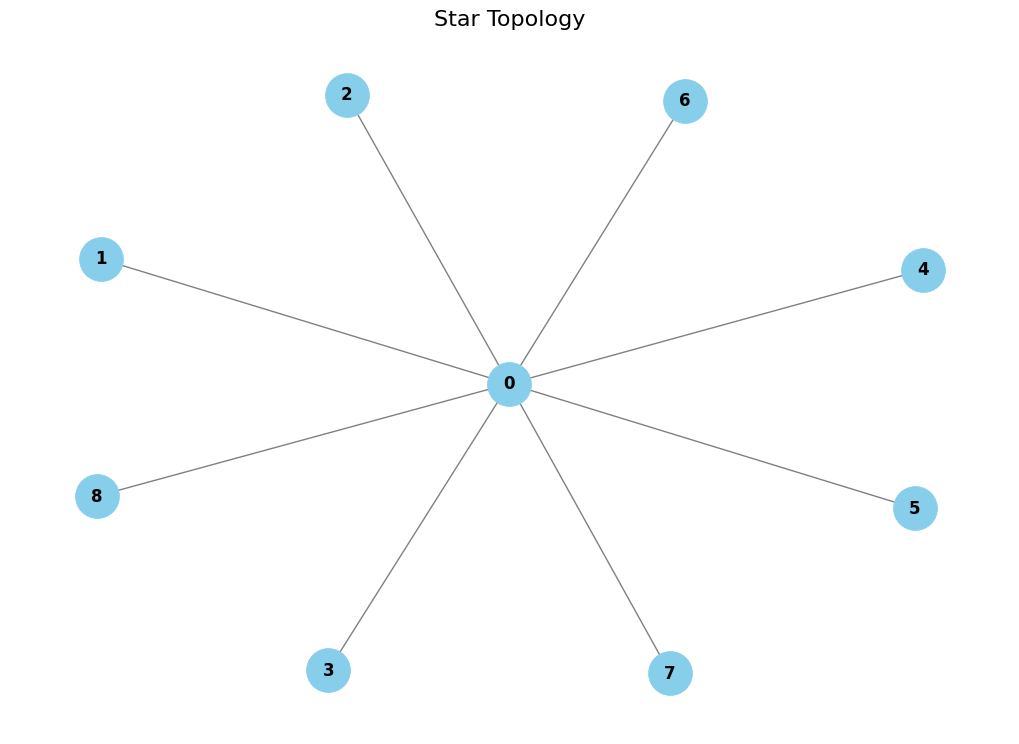

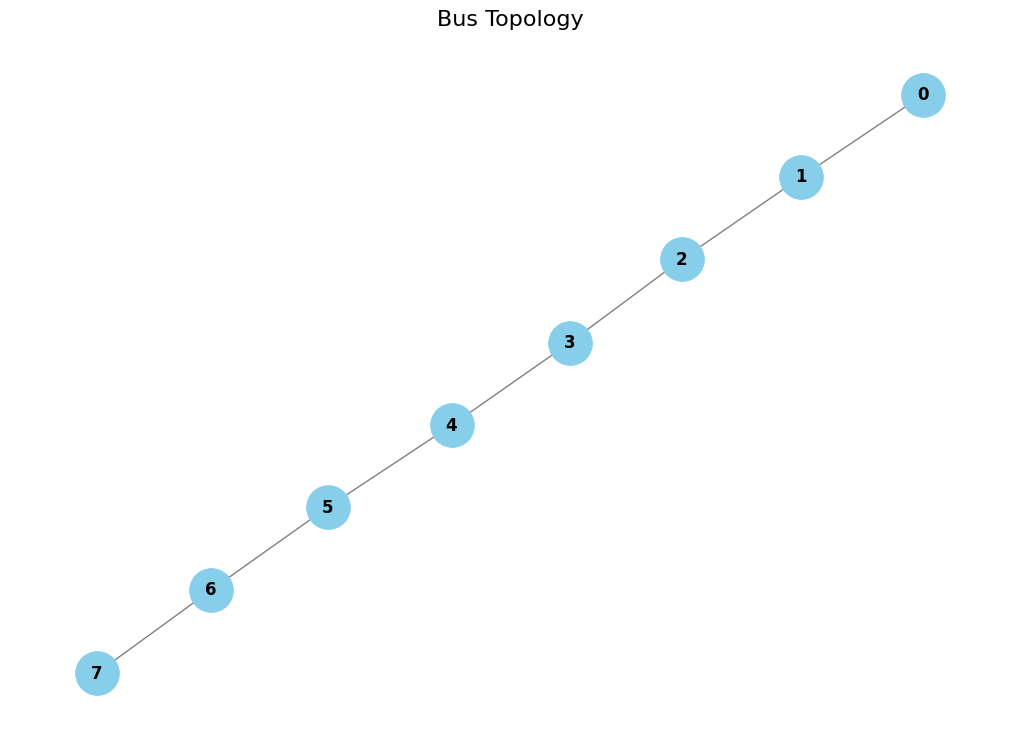

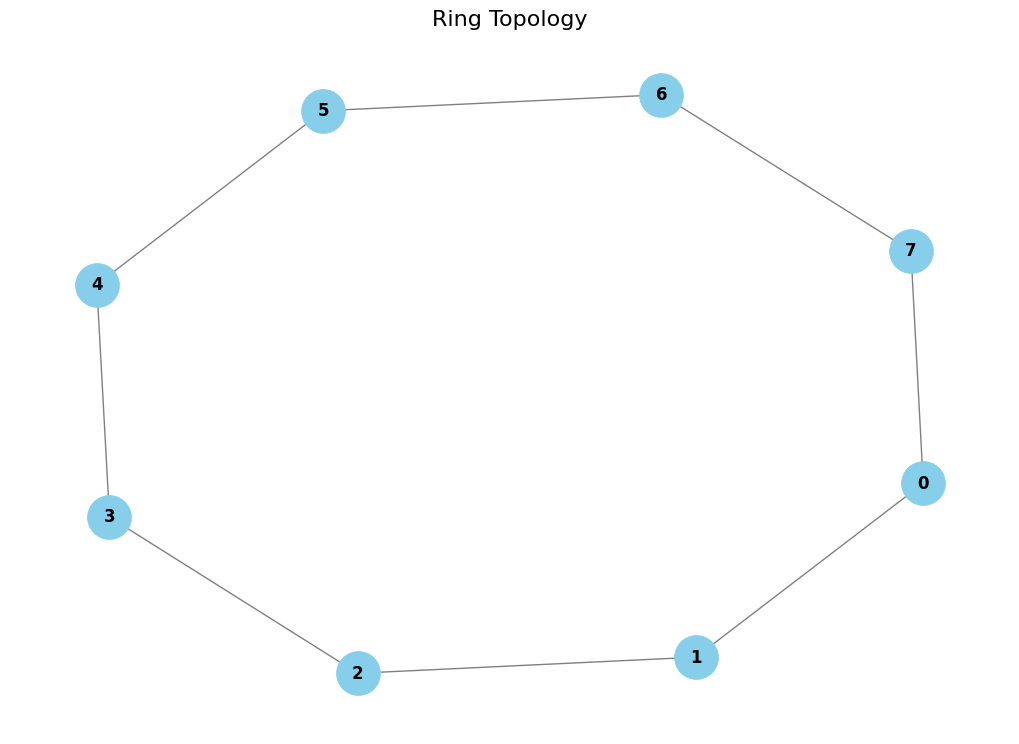

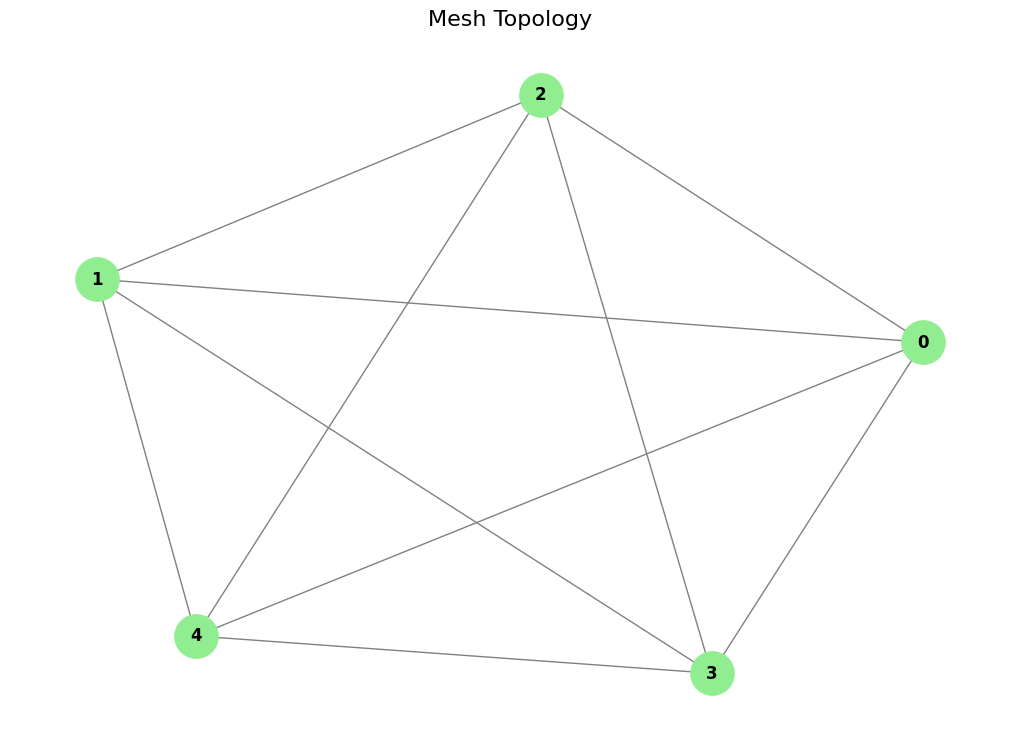

In [33]:
# Visualize different network topologies
visualize_network(create_star_network(), "Star Topology")
visualize_network(create_bus_network(), "Bus Topology", layout=nx.kamada_kawai_layout)
visualize_network(create_ring_network(), "Ring Topology")
visualize_network(create_mesh_network(), "Mesh Topology", node_color='lightgreen')

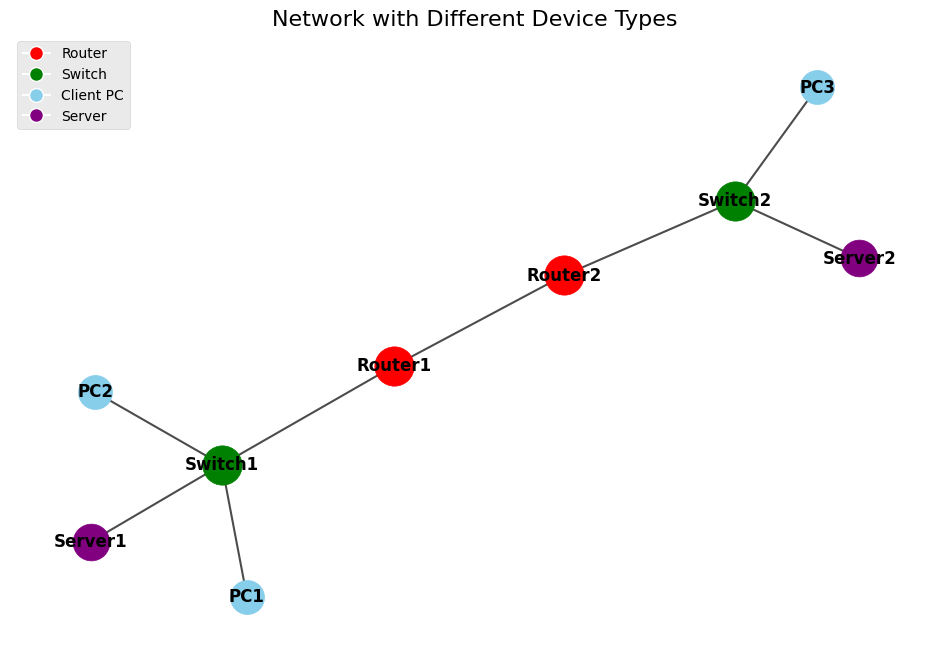

In [34]:
# Create a more complex network with different device types
def create_network_with_device_types():
    G = nx.Graph()

    # Add nodes with device types
    devices = {
        'Router1': 'router',
        'Router2': 'router',
        'Switch1': 'switch',
        'Switch2': 'switch',
        'PC1': 'client',
        'PC2': 'client',
        'PC3': 'client',
        'Server1': 'server',
        'Server2': 'server',
    }

    for device, dev_type in devices.items():
        G.add_node(device, type=dev_type)

    # Add connections
    connections = [
        ('Router1', 'Router2'),
        ('Router1', 'Switch1'),
        ('Router2', 'Switch2'),
        ('Switch1', 'PC1'),
        ('Switch1', 'PC2'),
        ('Switch2', 'PC3'),
        ('Switch1', 'Server1'),
        ('Switch2', 'Server2'),
    ]

    for source, target in connections:
        G.add_edge(source, target)

    return G, devices

# Visualize the complex network with color-coded device types
def visualize_network_with_device_types(G, devices):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # Color mapping for different device types
    color_map = {
        'router': 'red',
        'switch': 'green',
        'client': 'skyblue',
        'server': 'purple'
    }

    # Create lists of nodes by device type
    routers = [device for device, dev_type in devices.items() if dev_type == 'router']
    switches = [device for device, dev_type in devices.items() if dev_type == 'switch']
    clients = [device for device, dev_type in devices.items() if dev_type == 'client']
    servers = [device for device, dev_type in devices.items() if dev_type == 'server']

    # Draw each type of device with different colors
    nx.draw_networkx_nodes(G, pos, nodelist=routers, node_color='red', node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=switches, node_color='green', node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=clients, node_color='skyblue', node_size=600)
    nx.draw_networkx_nodes(G, pos, nodelist=servers, node_color='purple', node_size=700)

    # Draw edges and labels
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_weight='bold')

    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Router'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Switch'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Client PC'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Server')
    ]
    plt.legend(handles=legend_elements)

    plt.title("Network with Different Device Types", fontsize=16)
    plt.axis('off')
    plt.show()

# Create and visualize the network
network, devices = create_network_with_device_types()
visualize_network_with_device_types(network, devices)

## 3. Visualizing IP Addressing and Subnetting

IP addressing and subnetting are critical concepts in networking. Here we create visualizations to make these concepts more intuitive.

In [35]:
import ipaddress

def visualize_ip_address(ip_str):
    """Create a visual representation of IPv4 address"""
    ip = ipaddress.IPv4Address(ip_str)
    binary = bin(int(ip))[2:].zfill(32)
    octets = [binary[i:i+8] for i in range(0, 32, 8)]

    fig, ax = plt.subplots(figsize=(12, 2))
    plt.axis('off')

    for i, octet in enumerate(octets):
        for j, bit in enumerate(octet):
            color = 'lightblue' if bit == '1' else 'white'
            rect = plt.Rectangle((i*10+j, 0), 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)
            ax.text(i*10+j+0.5, 0.5, bit, ha='center', va='center')

    # Add octet separators
    for i in range(1, 4):
        ax.axvline(x=i*10, color='black', linestyle='-', alpha=0.3)

    # Add octet values at the bottom
    for i, octet in enumerate(ip_str.split('.')):
        ax.text(i*10+4, -0.5, octet, ha='center')

    ax.set_xlim(0, 40)
    ax.set_ylim(-1, 2)
    plt.title(f"Binary representation of IP: {ip_str}")
    plt.show()

def visualize_subnet_mask(cidr):
    """Visualize a subnet mask with CIDR notation"""
    network = ipaddress.IPv4Network(f'0.0.0.0/{cidr}', strict=False)
    mask_str = str(network.netmask)
    mask = ipaddress.IPv4Address(mask_str)
    binary = bin(int(mask))[2:].zfill(32)

    fig, ax = plt.subplots(figsize=(12, 2))
    plt.axis('off')

    for i in range(32):
        color = 'green' if i < cidr else 'lightgray'
        rect = plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(i+0.5, 0.5, binary[i], ha='center', va='center')

    # Add octet separators
    for i in range(1, 4):
        ax.axvline(x=i*8, color='black', linestyle='-', alpha=0.3)

    # Add octet values at the bottom
    octets = mask_str.split('.')
    for i, octet in enumerate(octets):
        ax.text(i*8+4, -0.5, octet, ha='center')

    ax.set_xlim(0, 32)
    ax.set_ylim(-1, 2)
    plt.title(f"Subnet Mask: {mask_str} (/{cidr})")
    plt.show()

    print(f"Network part: {'1' * cidr}{'0' * (32-cidr)}")
    print(f"Host part: {'0' * cidr}{'1' * (32-cidr)}")

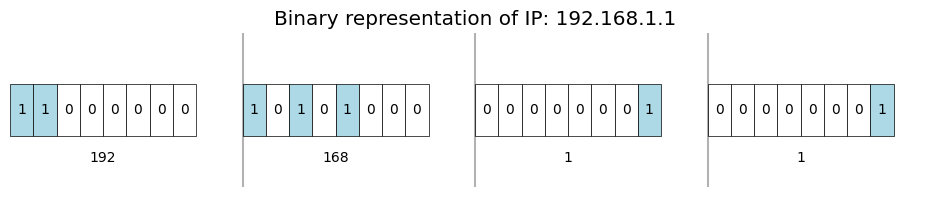

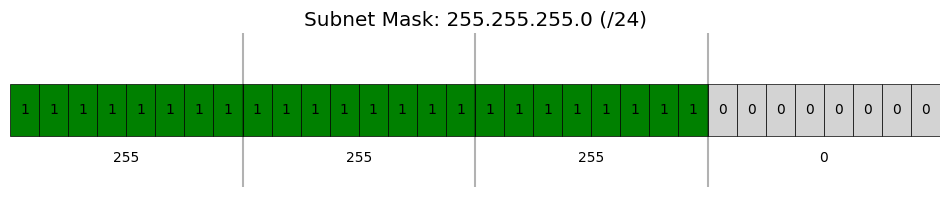

Network part: 11111111111111111111111100000000
Host part: 00000000000000000000000011111111


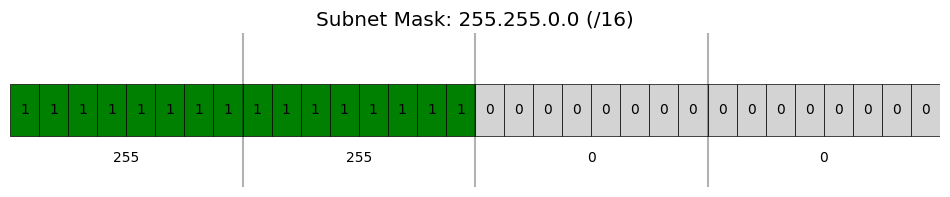

Network part: 11111111111111110000000000000000
Host part: 00000000000000001111111111111111


In [36]:
# Visualize an IP address
visualize_ip_address('192.168.1.1')

# Visualize different subnet masks
visualize_subnet_mask(24)  # /24 subnet (255.255.255.0)
visualize_subnet_mask(16)  # /16 subnet (255.255.0.0)

In [37]:
# Create a function to visualize subnetting
def visualize_subnetting(network_str, subnets=4):
    """Visualize subnet division of a network"""
    network = ipaddress.IPv4Network(network_str)
    subnet_list = list(network.subnets(prefixlen_diff=2))  # Create 4 subnets (2^2)

    # Prepare data for visualization
    # Use subnet.num_addresses to get the number of addresses in each subnet
    sizes = [subnet.num_addresses for subnet in subnet_list]
    labels = [str(subnet) for subnet in subnet_list]

    # Create pie chart for subnet allocation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Pie chart
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, explode=[0.1]*len(subnet_list))
    ax1.axis('equal')
    ax1.set_title(f"Dividing {network} into {len(subnet_list)} Subnets")

    # Table with subnet information
    table_data = []
    for i, subnet in enumerate(subnet_list):
        hosts = subnet.num_addresses - 2  # Subtract network and broadcast addresses using num_addresses
        table_data.append([
            f"Subnet {i+1}",
            str(subnet),
            str(subnet.network_address),
            str(subnet.broadcast_address),
            str(hosts)
        ])

    table = ax2.table(cellText=table_data,
                     colLabels=['Subnet', 'CIDR', 'Network Address', 'Broadcast Address', 'Usable Hosts'],
                     loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

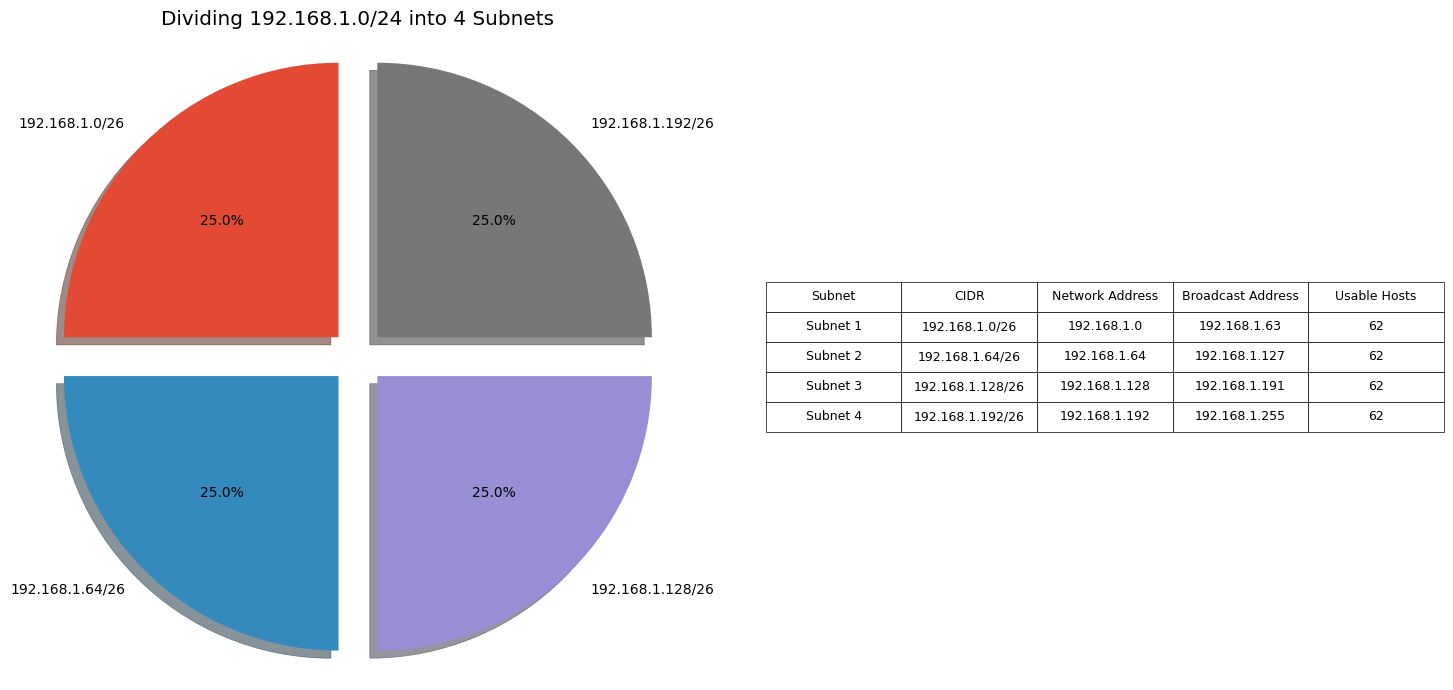

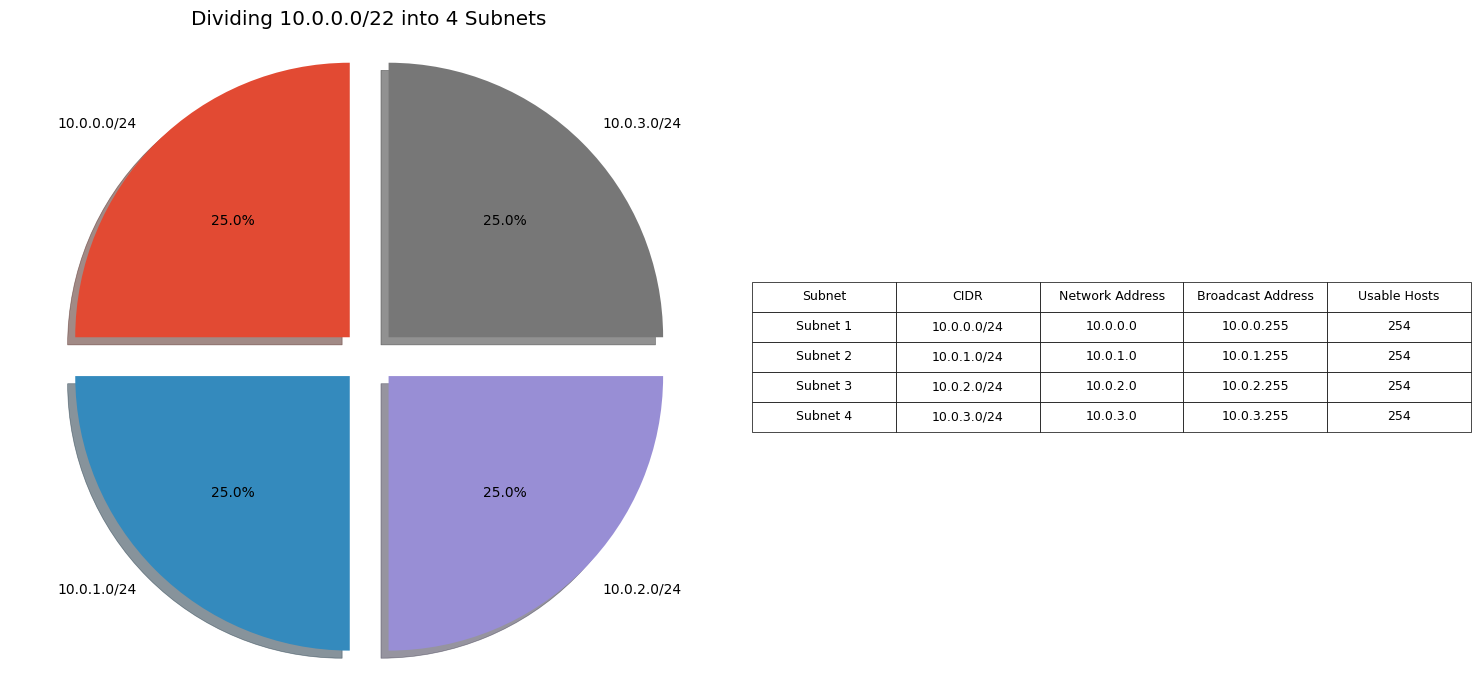

In [38]:
# Visualize subnetting examples
visualize_subnetting('192.168.1.0/24')
visualize_subnetting('10.0.0.0/22')

## 4. Building a Network Traffic Analyzer

In this section, we'll create visualizations for network traffic analysis. Since we can't capture actual packets in this notebook, we'll simulate packet data.

In [39]:
# Generate synthetic network traffic data
import random
from datetime import datetime, timedelta

def generate_packet_data(num_packets=1000):
    """Generate synthetic packet data for visualization"""
    protocols = ['TCP', 'UDP', 'ICMP', 'HTTP', 'HTTPS', 'DNS', 'SMTP']
    src_ips = [f'192.168.1.{i}' for i in range(1, 20)]
    dst_ips = [f'10.0.0.{i}' for i in range(1, 10)] + ['8.8.8.8', '1.1.1.1', '142.250.191.46']

    data = []
    start_time = datetime.now() - timedelta(hours=1)

    for i in range(num_packets):
        timestamp = start_time + timedelta(seconds=i*3.6)
        protocol = random.choice(protocols)
        src_ip = random.choice(src_ips)
        dst_ip = random.choice(dst_ips)

        # Packet size depends on protocol
        if protocol in ['HTTP', 'HTTPS']:
            size = random.randint(500, 1500)
        elif protocol == 'DNS':
            size = random.randint(50, 200)
        else:
            size = random.randint(100, 800)

        data.append({
            'timestamp': timestamp,
            'protocol': protocol,
            'src_ip': src_ip,
            'dst_ip': dst_ip,
            'size': size,
            'ttl': random.randint(30, 64)
        })

    return pd.DataFrame(data)

# Generate packet data
packet_df = generate_packet_data(1000)
packet_df.head()

,timestamp,protocol,src_ip,dst_ip,size,ttl
0,2025-04-23 07:47:31.777471,HTTPS,192.168.1.17,142.250.191.46,545,41
1,2025-04-23 07:47:35.377471,SMTP,192.168.1.4,10.0.0.3,377,40
2,2025-04-23 07:47:38.977471,HTTPS,192.168.1.11,1.1.1.1,1042,43
3,2025-04-23 07:47:42.577471,ICMP,192.168.1.13,10.0.0.9,324,32
4,2025-04-23 07:47:46.177471,HTTPS,192.168.1.7,142.250.191.46,688,34


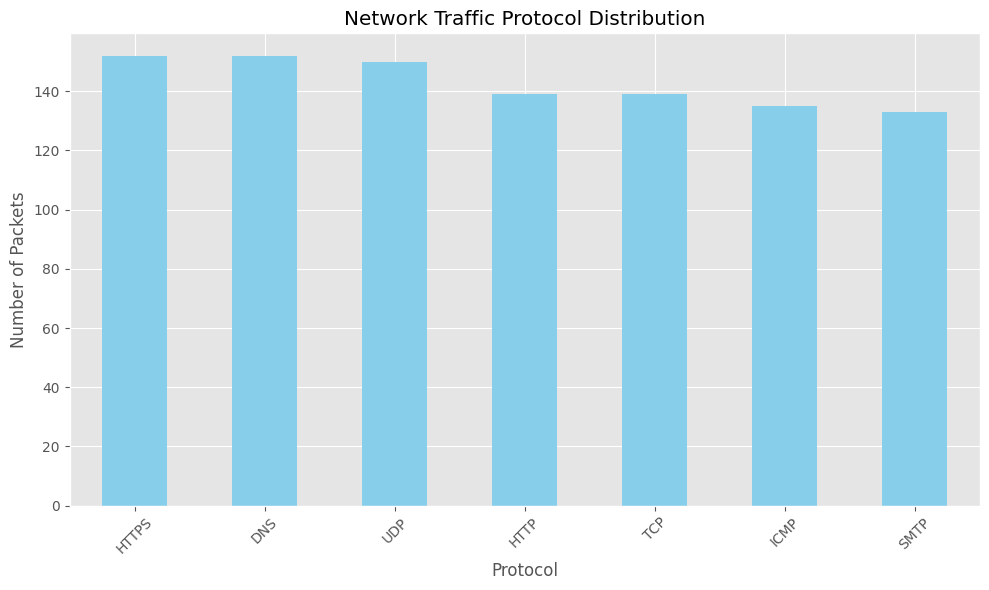

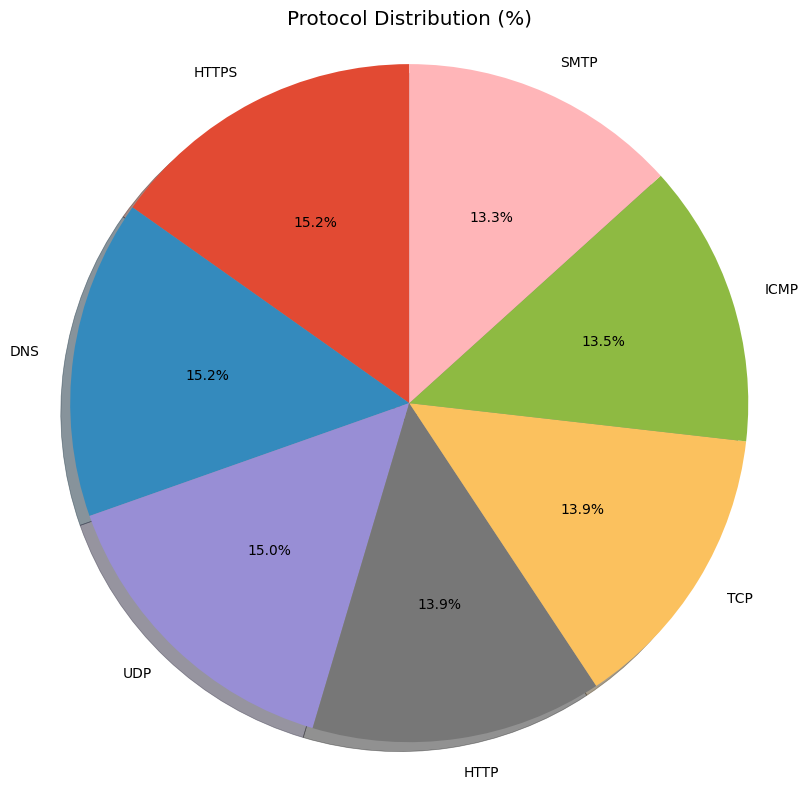

In [40]:
# Analyze protocol distribution
protocol_counts = packet_df['protocol'].value_counts()

# Create a bar chart of protocol distribution
plt.figure(figsize=(10, 6))
protocol_counts.plot(kind='bar', color='skyblue')
plt.title('Network Traffic Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Protocol Distribution (%)')
plt.tight_layout()
plt.show()

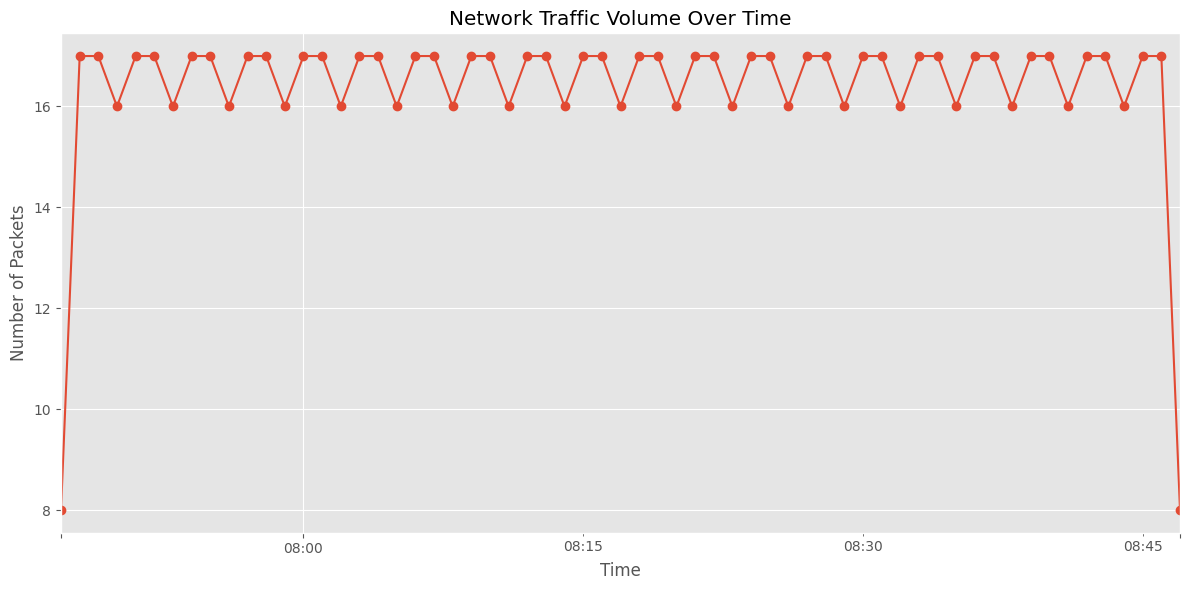

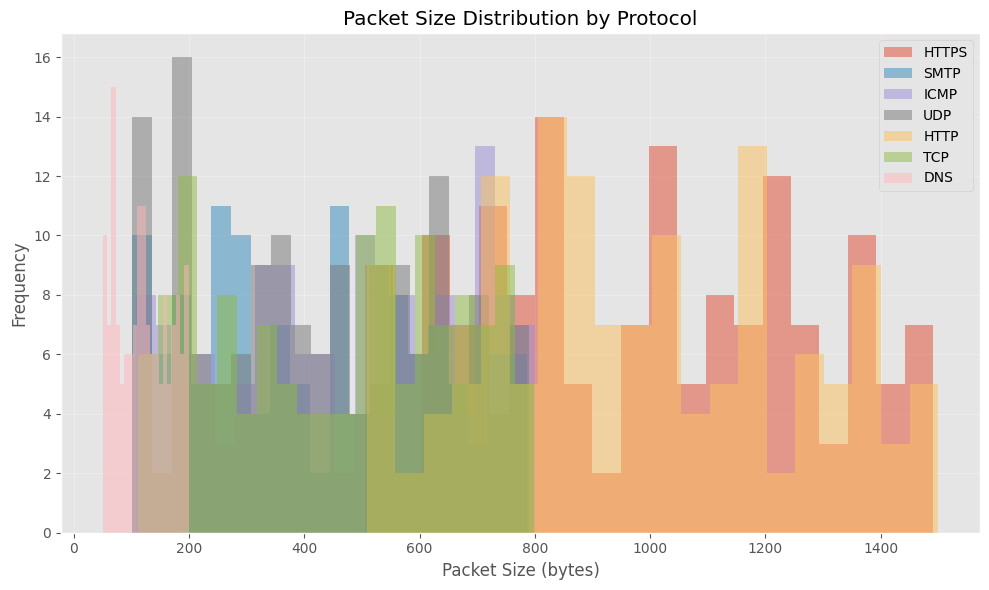

In [41]:
# Analyze traffic over time
packet_df['minute'] = packet_df['timestamp'].dt.floor('min')
traffic_by_time = packet_df.groupby('minute').size()

# Plot time series of network traffic
plt.figure(figsize=(12, 6))
traffic_by_time.plot(marker='o')
plt.title('Network Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze traffic by packet size and protocol
plt.figure(figsize=(10, 6))
for protocol in packet_df['protocol'].unique():
    subset = packet_df[packet_df['protocol'] == protocol]
    plt.hist(subset['size'], alpha=0.5, label=protocol, bins=20)

plt.title('Packet Size Distribution by Protocol')
plt.xlabel('Packet Size (bytes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

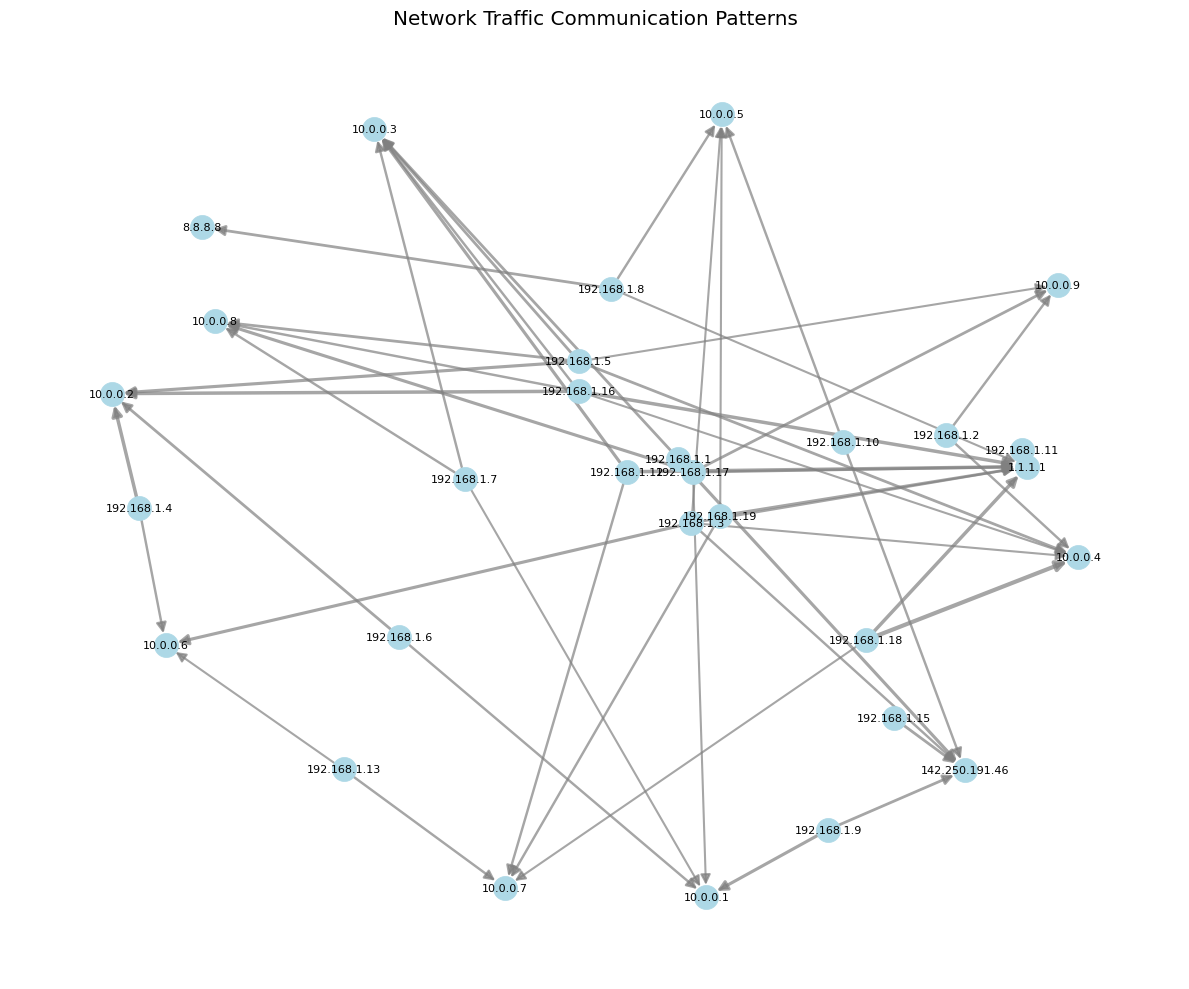

In [42]:
# Create a network communication graph
def create_traffic_graph(packets, top_n=50):
    """Create a network graph showing communication patterns"""
    # Count traffic between IP pairs
    traffic_counts = packets.groupby(['src_ip', 'dst_ip']).size().reset_index(name='count')
    traffic_counts = traffic_counts.sort_values('count', ascending=False).head(top_n)

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges with weight based on traffic count
    for _, row in traffic_counts.iterrows():
        G.add_edge(row['src_ip'], row['dst_ip'], weight=row['count'])

    return G

# Create and visualize the traffic graph
traffic_graph = create_traffic_graph(packet_df)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(traffic_graph, seed=42)

# Get edge weights for line thickness
edges = traffic_graph.edges()
weights = [traffic_graph[u][v]['weight'] for u, v in edges]
max_weight = max(weights)
normalized_weights = [3*w/max_weight for w in weights]

# Draw the network
nx.draw_networkx_nodes(traffic_graph, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(traffic_graph, pos, width=normalized_weights, alpha=0.7,
                      edge_color='grey', arrows=True, arrowsize=15)
nx.draw_networkx_labels(traffic_graph, pos, font_size=8)

plt.title('Network Traffic Communication Patterns')
plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Plotting Network Performance Metrics

In this section, we'll simulate and visualize network performance metrics like latency, throughput, and packet loss.

In [43]:
# Function to generate synthetic network performance data
def generate_performance_data(hours=24, interval_minutes=5):
    """Generate synthetic network performance metrics data"""
    # Calculate number of data points
    points = int((hours * 60) / interval_minutes)

    # Generate timestamps
    start_time = datetime.now() - timedelta(hours=hours)
    timestamps = [start_time + timedelta(minutes=i*interval_minutes) for i in range(points)]

    # Generate metrics with daily patterns
    data = []
    for ts in timestamps:
        hour = ts.hour

        # Latency tends to be higher during business hours
        base_latency = 20 if 8 <= hour <= 18 else 15
        latency = base_latency + random.normalvariate(0, 5)

        # Throughput tends to be lower during business hours
        base_throughput = 80 if 8 <= hour <= 18 else 95
        throughput = base_throughput + random.normalvariate(0, 10)

        # Packet loss tends to increase with higher traffic
        base_packet_loss = 1.5 if 8 <= hour <= 18 else 0.8
        packet_loss = max(0, base_packet_loss + random.normalvariate(0, 0.5))

        # Jitter (variance in latency)
        jitter = random.uniform(1, 5) if 8 <= hour <= 18 else random.uniform(0.5, 3)

        data.append({
            'timestamp': ts,
            'latency_ms': max(1, latency),
            'throughput_mbps': max(1, throughput),
            'packet_loss_percent': packet_loss,
            'jitter_ms': jitter
        })

    return pd.DataFrame(data)

# Generate performance data
perf_df = generate_performance_data(24, 15)
perf_df.head()

,timestamp,latency_ms,throughput_mbps,packet_loss_percent,jitter_ms
0,2025-04-22 08:47:33.507091,15.047837,97.520794,0.928908,1.419897
1,2025-04-22 09:02:33.507091,23.524407,59.786877,1.708313,2.055930
2,2025-04-22 09:17:33.507091,21.256642,82.336756,1.038012,1.566395
3,2025-04-22 09:32:33.507091,25.820823,84.163139,1.100341,2.850829
4,2025-04-22 09:47:33.507091,16.337290,80.458174,1.312479,3.381473


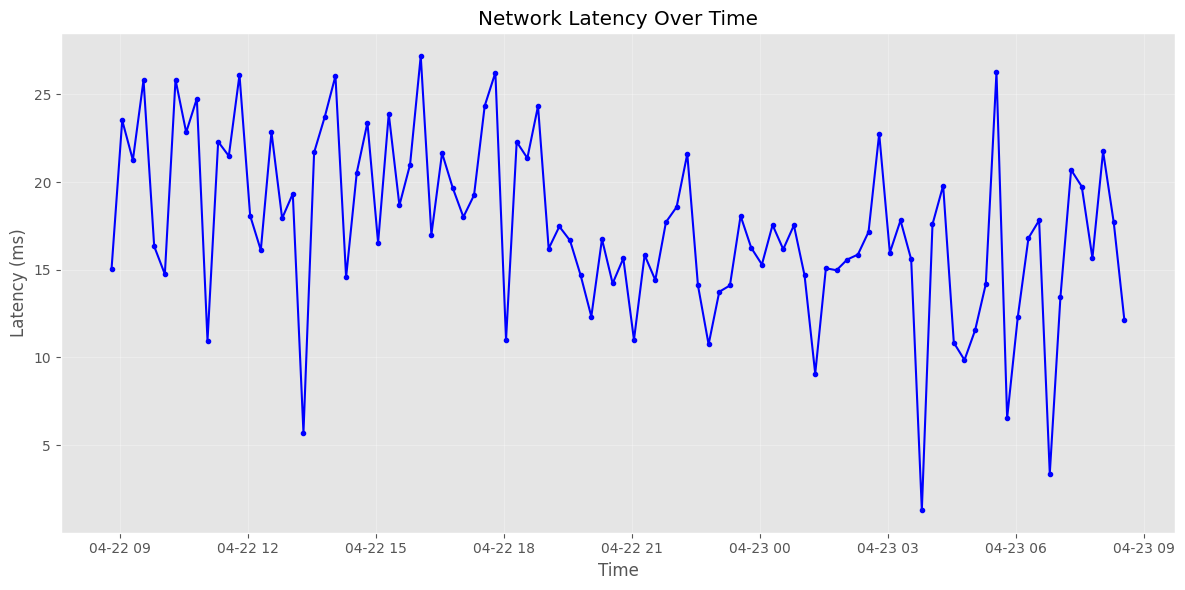

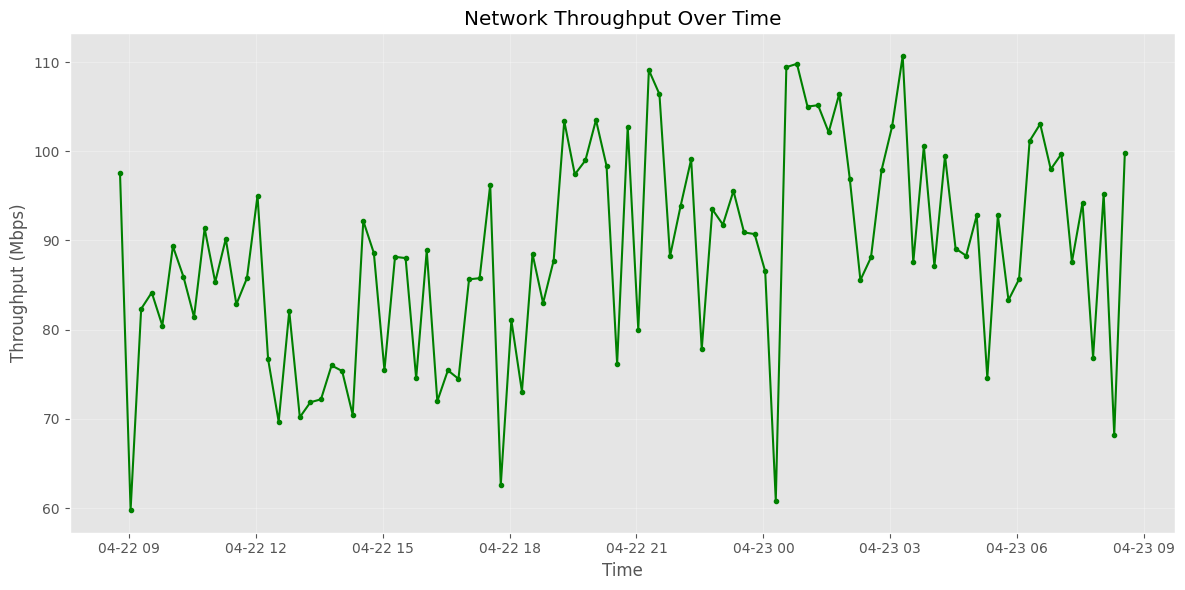

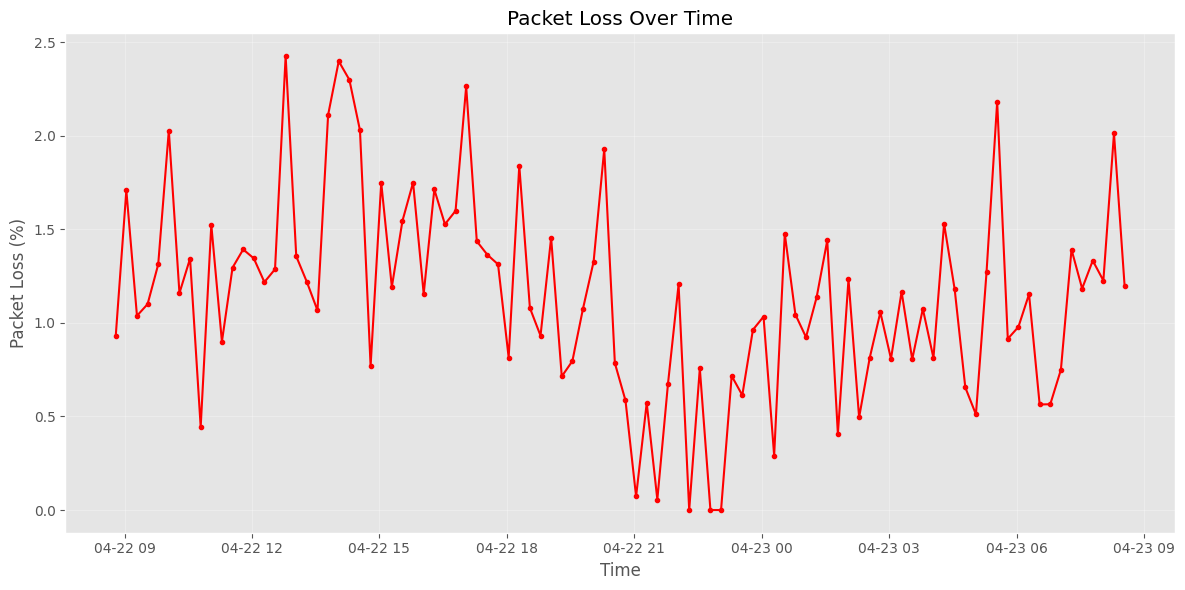

In [44]:
# Plot latency over time
plt.figure(figsize=(12, 6))
plt.plot(perf_df['timestamp'], perf_df['latency_ms'], 'b-', marker='o', markersize=3)
plt.title('Network Latency Over Time')
plt.xlabel('Time')
plt.ylabel('Latency (ms)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot throughput over time
plt.figure(figsize=(12, 6))
plt.plot(perf_df['timestamp'], perf_df['throughput_mbps'], 'g-', marker='o', markersize=3)
plt.title('Network Throughput Over Time')
plt.xlabel('Time')
plt.ylabel('Throughput (Mbps)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot packet loss percentage over time
plt.figure(figsize=(12, 6))
plt.plot(perf_df['timestamp'], perf_df['packet_loss_percent'], 'r-', marker='o', markersize=3)
plt.title('Packet Loss Over Time')
plt.xlabel('Time')
plt.ylabel('Packet Loss (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

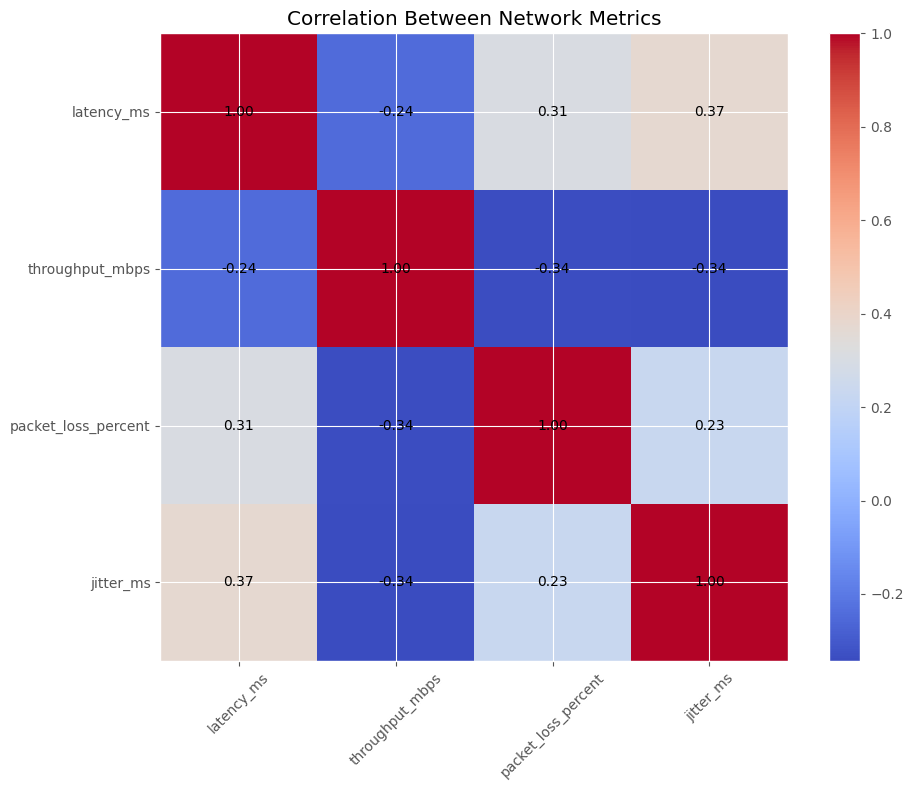

In [45]:
# Create a correlation matrix between different metrics
correlation = perf_df[['latency_ms', 'throughput_mbps', 'packet_loss_percent', 'jitter_ms']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation, cmap='coolwarm')
plt.colorbar(im)
plt.title('Correlation Between Network Metrics')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)

# Add text annotations
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        text = plt.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [46]:
# Create a more interactive plot with Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=('Latency (ms)', 'Throughput (Mbps)', 'Packet Loss (%)'))

# Add traces
fig.add_trace(
    go.Scatter(x=perf_df['timestamp'], y=perf_df['latency_ms'], mode='lines+markers', name='Latency'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=perf_df['timestamp'], y=perf_df['throughput_mbps'], mode='lines+markers', name='Throughput'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=perf_df['timestamp'], y=perf_df['packet_loss_percent'], mode='lines+markers', name='Packet Loss'),
    row=3, col=1
)

# Update layout
fig.update_layout(height=900, width=1000, title_text="Network Performance Dashboard",
                 hovermode="x unified")
fig.update_layout(showlegend=False)

fig.show()

## 6. Visualizing Network Protocols

In this section, we'll create visual representations of how common network protocols work.

In [47]:
import matplotlib.patches as patches

def visualize_tcp_handshake():
    """Visualize the TCP three-way handshake process"""
    fig, ax = plt.subplots(figsize=(10, 6))

    # Setup the axis
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Draw vertical lines for client and server
    ax.axvline(x=2, color='gray', linestyle='-', ymin=0.1, ymax=0.9)
    ax.axvline(x=8, color='gray', linestyle='-', ymin=0.1, ymax=0.9)

    # Add labels for client and server
    ax.text(2, 9.5, 'Client', fontsize=12, ha='center')
    ax.text(8, 9.5, 'Server', fontsize=12, ha='center')

    # Draw SYN arrow
    ax.arrow(2, 8, 5.5, -2, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
    ax.text(5, 7, 'SYN: SEQ=x', fontsize=10, ha='center', color='blue')

    # Draw SYN-ACK arrow
    ax.arrow(8, 5.5, -5.5, -2, head_width=0.3, head_length=0.3, fc='green', ec='green')
    ax.text(5, 4.5, 'SYN-ACK: SEQ=y, ACK=x+1', fontsize=10, ha='center', color='green')

    # Draw ACK arrow
    ax.arrow(2, 3, 5.5, -2, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.text(5, 2, 'ACK: SEQ=x+1, ACK=y+1', fontsize=10, ha='center', color='red')

    # Add connection established annotation
    rect = patches.Rectangle((3.5, 0.5), 3, 0.8, linewidth=1, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(rect)
    ax.text(5, 0.9, 'Connection Established', fontsize=10, ha='center')

    plt.title('TCP Three-Way Handshake', fontsize=14)
    plt.tight_layout()
    plt.show()

def visualize_dns_lookup():
    """Visualize the DNS lookup process"""
    fig, ax = plt.subplots(figsize=(12, 8))

    # Setup the axis
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Draw nodes
    nodes = {
        'client': (1, 5),
        'local_dns': (3, 7),
        'root_dns': (5, 9),
        'tld_dns': (7, 7),
        'auth_dns': (9, 5),
    }

    node_labels = {
        'client': 'Client',
        'local_dns': 'Local DNS\nResolver',
        'root_dns': 'Root DNS\nServer',
        'tld_dns': 'TLD DNS\nServer (.com)',
        'auth_dns': 'Authoritative\nDNS Server',
    }

    # Draw circles for nodes
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lavender']
    for i, (node, pos) in enumerate(nodes.items()):
        circle = plt.Circle(pos, 0.7, color=colors[i], ec='black')
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], node_labels[node], ha='center', va='center', fontsize=9)

    # Draw arrows for DNS lookup sequence
    arrows = [
        ('client', 'local_dns', 1, "1. Query: example.com?"),
        ('local_dns', 'root_dns', 2, "2. Query: example.com?"),
        ('root_dns', 'local_dns', 3, "3. Refer to .com DNS"),
        ('local_dns', 'tld_dns', 4, "4. Query: example.com?"),
        ('tld_dns', 'local_dns', 5, "5. Refer to example.com DNS"),
        ('local_dns', 'auth_dns', 6, "6. Query: example.com?"),
        ('auth_dns', 'local_dns', 7, "7. Response: 93.184.216.34"),
        ('local_dns', 'client', 8, "8. Response: 93.184.216.34"),
    ]

    for i, (src, dst, seq, label) in enumerate(arrows):
        src_pos = nodes[src]
        dst_pos = nodes[dst]
        dx = dst_pos[0] - src_pos[0]
        dy = dst_pos[1] - src_pos[1]

        # Calculate arrow start and end positions
        norm = (dx**2 + dy**2) ** 0.5
        udx, udy = dx/norm, dy/norm
        start_x = src_pos[0] + udx * 0.7
        start_y = src_pos[1] + udy * 0.7
        end_x = dst_pos[0] - udx * 0.7
        end_y = dst_pos[1] - udy * 0.7

        # Draw the arrow
        ax.arrow(start_x, start_y, end_x-start_x, end_y-start_y,
                head_width=0.2, head_length=0.2, fc='black', ec='black', length_includes_head=True)

        # Position the label
        mid_x = (src_pos[0] + dst_pos[0]) / 2
        mid_y = (src_pos[1] + dst_pos[1]) / 2
        offset_x = -dy * 0.03
        offset_y = dx * 0.03

        ax.text(mid_x + offset_x, mid_y + offset_y, label, fontsize=8, ha='left', va='bottom',
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

    plt.title('DNS Lookup Process for example.com', fontsize=14)
    plt.tight_layout()
    plt.show()

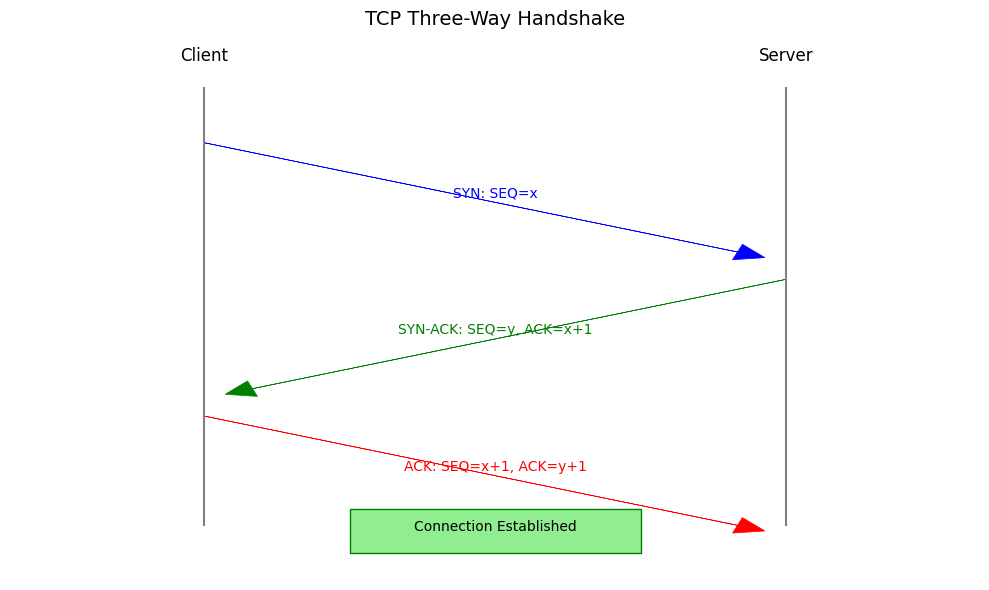

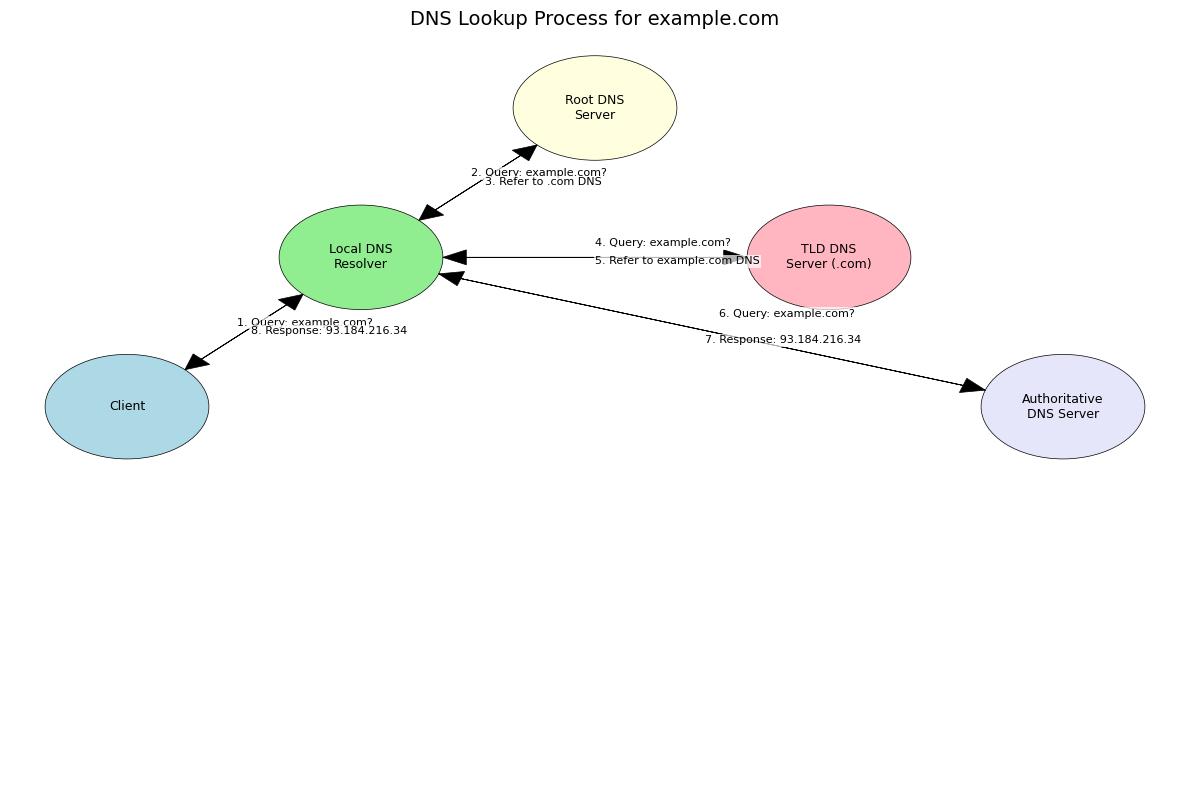

In [48]:
# Visualize the TCP handshake protocol
visualize_tcp_handshake()

# Visualize the DNS lookup protocol
visualize_dns_lookup()

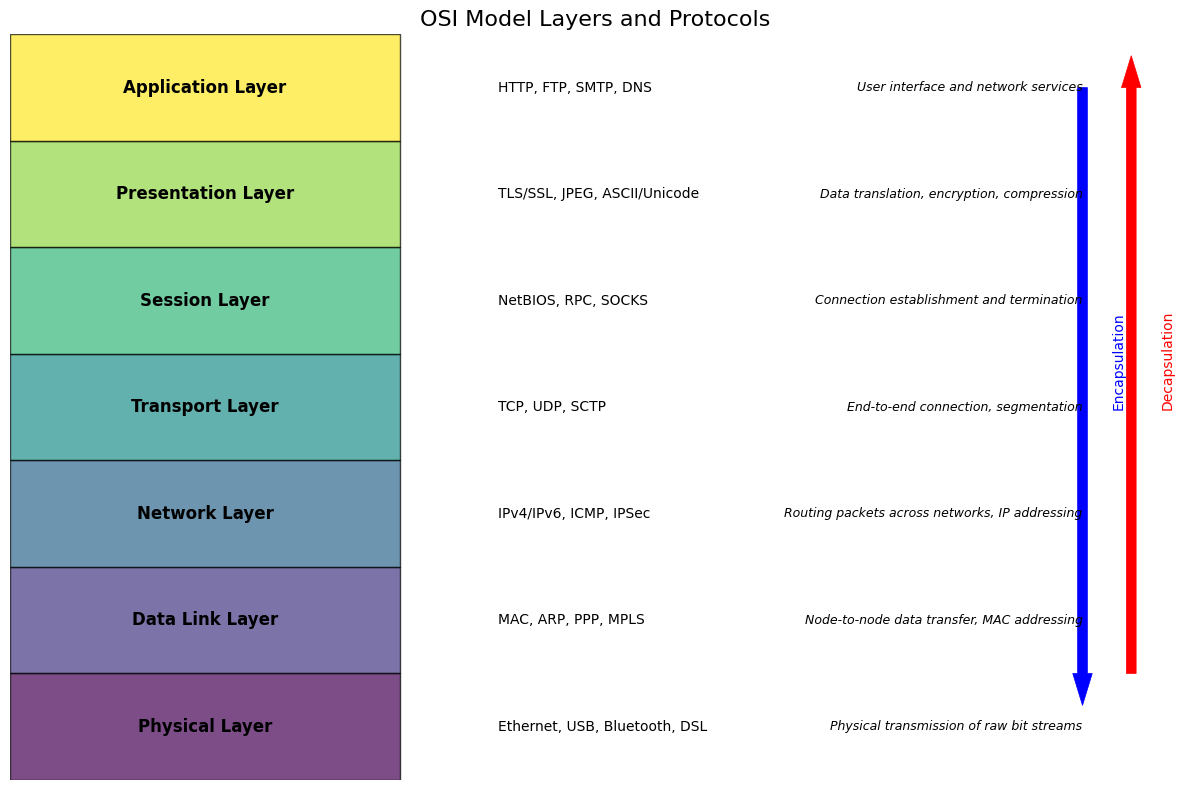

In [49]:
def visualize_osi_model():
    """Visualize the OSI model layers and protocols"""
    # Define OSI layers and protocols
    layers = [
        "Physical Layer",
        "Data Link Layer",
        "Network Layer",
        "Transport Layer",
        "Session Layer",
        "Presentation Layer",
        "Application Layer"
    ]

    protocols = [
        "Ethernet, USB, Bluetooth, DSL",
        "MAC, ARP, PPP, MPLS",
        "IPv4/IPv6, ICMP, IPSec",
        "TCP, UDP, SCTP",
        "NetBIOS, RPC, SOCKS",
        "TLS/SSL, JPEG, ASCII/Unicode",
        "HTTP, FTP, SMTP, DNS"
    ]

    descriptions = [
        "Physical transmission of raw bit streams",
        "Node-to-node data transfer, MAC addressing",
        "Routing packets across networks, IP addressing",
        "End-to-end connection, segmentation",
        "Connection establishment and termination",
        "Data translation, encryption, compression",
        "User interface and network services"
    ]

    colors = plt.cm.viridis(np.linspace(0, 1, len(layers)))

    # Create the visualization
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, (layer, protocol, desc, color) in enumerate(zip(layers, protocols, descriptions, colors)):
        y_pos = i + 0.5
        rect = patches.Rectangle((0, i), 4, 1, linewidth=1, edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
        ax.text(2, y_pos, layer, ha='center', va='center', fontsize=12, fontweight='bold')

        # Add protocols
        ax.text(5, y_pos, protocol, ha='left', va='center', fontsize=10)

        # Add description
        ax.text(11, y_pos, desc, ha='right', va='center', fontsize=9, style='italic')

    # Add data encapsulation arrow
    ax.arrow(11, 6.5, 0, -5.5, head_width=0.2, head_length=0.3, fc='blue', ec='blue', width=0.1)
    ax.text(11.3, 3.5, 'Encapsulation', fontsize=10, rotation=90, color='blue')

    # Add data decapsulation arrow
    ax.arrow(11.5, 1, 0, 5.5, head_width=0.2, head_length=0.3, fc='red', ec='red', width=0.1)
    ax.text(11.8, 3.5, 'Decapsulation', fontsize=10, rotation=90, color='red')

    ax.set_xlim(0, 12)
    ax.set_ylim(0, len(layers))
    ax.axis('off')

    plt.title('OSI Model Layers and Protocols', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize the OSI model
visualize_osi_model()

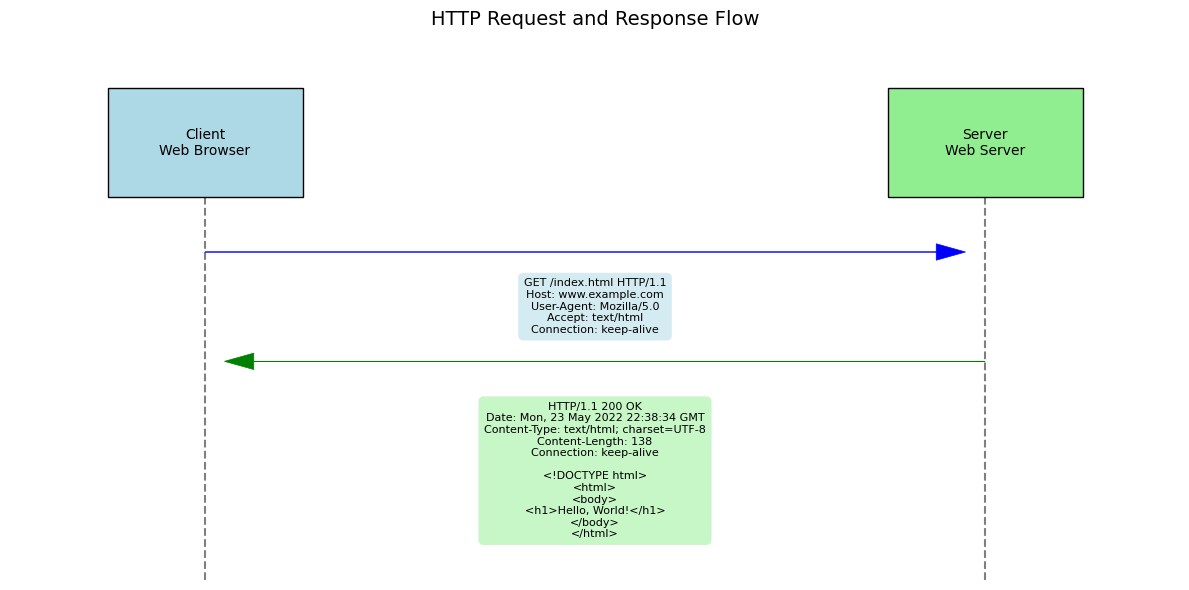

In [50]:
def visualize_http_request_response():
    """Visualize the HTTP request and response flow"""
    fig, ax = plt.subplots(figsize=(12, 6))

    # Setup the axis
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Draw client and server
    client = patches.Rectangle((1, 7), 2, 2, linewidth=1, edgecolor='black', facecolor='lightblue')
    server = patches.Rectangle((9, 7), 2, 2, linewidth=1, edgecolor='black', facecolor='lightgreen')
    ax.add_patch(client)
    ax.add_patch(server)

    ax.text(2, 8, 'Client\nWeb Browser', ha='center', va='center', fontsize=10)
    ax.text(10, 8, 'Server\nWeb Server', ha='center', va='center', fontsize=10)

    # Draw timeline
    ax.plot([2, 2], [0, 7], 'k--', alpha=0.5)
    ax.plot([10, 10], [0, 7], 'k--', alpha=0.5)

    # HTTP request
    ax.arrow(2, 6, 7.5, 0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')

    # Request details
    request_details = """GET /index.html HTTP/1.1
Host: www.example.com
User-Agent: Mozilla/5.0
Accept: text/html
Connection: keep-alive"""

    ax.text(6, 5, request_details, ha='center', va='center', fontsize=8,
           bbox=dict(facecolor='lightblue', alpha=0.5, boxstyle='round,pad=0.5'))

    # HTTP response
    ax.arrow(10, 4, -7.5, 0, head_width=0.3, head_length=0.3, fc='green', ec='green')

    # Response details
    response_details = """HTTP/1.1 200 OK
Date: Mon, 23 May 2022 22:38:34 GMT
Content-Type: text/html; charset=UTF-8
Content-Length: 138
Connection: keep-alive

<!DOCTYPE html>
<html>
<body>
<h1>Hello, World!</h1>
</body>
</html>"""

    ax.text(6, 2, response_details, ha='center', va='center', fontsize=8,
           bbox=dict(facecolor='lightgreen', alpha=0.5, boxstyle='round,pad=0.5'))

    plt.title('HTTP Request and Response Flow', fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize the HTTP request-response flow
visualize_http_request_response()

## 7. Creating an Interactive Network Simulator

In this section, we'll create a simple interactive network simulator that demonstrates various networking concepts.

In [51]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def routing_simulator():
    """Interactive simulator for routing algorithms"""
    # Create a simple network graph
    G = nx.Graph()
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    edges = [('A', 'B', 5), ('A', 'C', 2), ('B', 'D', 4), ('B', 'E', 2),
             ('C', 'B', 1), ('C', 'D', 7), ('D', 'F', 3), ('E', 'D', 1), ('E', 'F', 8)]

    G.add_nodes_from(nodes)
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    # Create widgets for interaction
    source_dropdown = widgets.Dropdown(
        options=nodes,
        value='A',
        description='Source:',
    )

    target_dropdown = widgets.Dropdown(
        options=nodes,
        value='F',
        description='Target:',
    )

    algorithm_dropdown = widgets.Dropdown(
        options=['Dijkstra', 'Bellman-Ford'],
        value='Dijkstra',
        description='Algorithm:',
    )

    button = widgets.Button(
        description='Calculate Path',
        button_style='info',
    )

    output = widgets.Output()

    # Define the layout
    ui = widgets.VBox([
        widgets.HBox([source_dropdown, target_dropdown, algorithm_dropdown]),
        button,
        output
    ])

    # Define button click handler
    def on_button_click(b):
        with output:
            clear_output(wait=True)

            source = source_dropdown.value
            target = target_dropdown.value
            algorithm = algorithm_dropdown.value

            # Calculate shortest path
            if algorithm == 'Dijkstra':
                path = nx.dijkstra_path(G, source, target, weight='weight')
                length = nx.dijkstra_path_length(G, source, target, weight='weight')
            else:  # Bellman-Ford
                path = nx.bellman_ford_path(G, source, target, weight='weight')
                length = nx.bellman_ford_path_length(G, source, target, weight='weight')

            # Visualize the network and path
            plt.figure(figsize=(10, 6))
            pos = nx.spring_layout(G, seed=42)

            # Draw all edges
            edge_width = [3 if (u, v) in zip(path[:-1], path[1:]) or (v, u) in zip(path[:-1], path[1:]) else 1
                         for u, v in G.edges()]

            # Draw the network
            nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
            nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.7)

            # Highlight path nodes
            nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=500)

            # Add edge labels (weights)
            edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

            # Add node labels
            nx.draw_networkx_labels(G, pos)

            plt.title(f'Shortest Path using {algorithm} Algorithm: {" -> ".join(path)} (Cost: {length})')
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            # Print detail
            print(f"Shortest path from {source} to {target} using {algorithm}:")
            print(f"Path: {' -> '.join(path)}")
            print(f"Total cost: {length}")

            # Show the path breakdown
            if len(path) > 1:
                print("\nPath breakdown:")
                for i in range(len(path)-1):
                    u, v = path[i], path[i+1]
                    w = G[u][v]['weight']
                    print(f"{u} -> {v}: {w}")

    button.on_click(on_button_click)
    return ui

# Display the routing simulator
routing_simulator()

In [52]:
def congestion_control_simulator():
    """Interactive simulator for TCP congestion control"""
    # Create widgets
    timeout_slider = widgets.FloatSlider(
        value=0.05,
        min=0.01,
        max=0.2,
        step=0.01,
        description='Timeout (s):',
        continuous_update=False
    )

    loss_rate_slider = widgets.FloatSlider(
        value=0.01,
        min=0,
        max=0.2,
        step=0.01,
        description='Packet Loss:',
        continuous_update=False
    )

    algorithm_dropdown = widgets.Dropdown(
        options=['TCP Reno', 'TCP Tahoe', 'TCP CUBIC'],
        value='TCP Reno',
        description='Algorithm:',
    )

    simulation_time_slider = widgets.IntSlider(
        value=100,
        min=50,
        max=500,
        step=10,
        description='Sim Time:',
        continuous_update=False
    )

    run_button = widgets.Button(
        description='Run Simulation',
        button_style='success',
    )

    output = widgets.Output()

    # Define the layout
    ui = widgets.VBox([
        widgets.HBox([algorithm_dropdown, timeout_slider]),
        widgets.HBox([loss_rate_slider, simulation_time_slider]),
        run_button,
        output
    ])

    def simulate_tcp_congestion_control(algorithm, timeout, loss_rate, time_steps):
        """Simulate TCP congestion control algorithm"""
        # Initial parameters
        cwnd = []  # Congestion window size
        ssthresh = []  # Slow start threshold
        current_cwnd = 1  # Start with 1 segment
        current_ssthresh = 64  # Initial threshold

        # TCP states
        states = []  # 0 = slow start, 1 = congestion avoidance, 2 = fast recovery
        current_state = 0  # Start in slow start

        # Time steps
        time = np.arange(time_steps)

        for t in range(time_steps):
            # Record current values
            cwnd.append(current_cwnd)
            ssthresh.append(current_ssthresh)
            states.append(current_state)

            # Simulate random packet loss
            packet_loss = np.random.random() < loss_rate

            # Apply TCP congestion control algorithm
            if algorithm == 'TCP Reno':
                if packet_loss:
                    if current_state != 2:  # Not already in fast recovery
                        current_ssthresh = max(current_cwnd // 2, 2)
                        if np.random.random() < timeout:  # Timeout
                            current_cwnd = 1
                            current_state = 0  # Slow start
                        else:  # Fast retransmit
                            current_cwnd = current_ssthresh + 3  # For 3 duplicate ACKs
                            current_state = 2  # Fast recovery
                else:
                    if current_state == 0:  # Slow start
                        current_cwnd += 1
                        if current_cwnd >= current_ssthresh:
                            current_state = 1  # Move to congestion avoidance
                    elif current_state == 1:  # Congestion avoidance
                        current_cwnd += 1 / current_cwnd
                    elif current_state == 2:  # Fast recovery
                        current_cwnd += 1
                        if current_cwnd >= current_ssthresh:
                            current_state = 1  # Move to congestion avoidance

            elif algorithm == 'TCP Tahoe':
                if packet_loss:
                    current_ssthresh = max(current_cwnd // 2, 2)
                    current_cwnd = 1
                    current_state = 0  # Always go back to slow start
                else:
                    if current_state == 0:  # Slow start
                        current_cwnd += 1
                        if current_cwnd >= current_ssthresh:
                            current_state = 1  # Move to congestion avoidance
                    elif current_state == 1:  # Congestion avoidance
                        current_cwnd += 1 / current_cwnd

            elif algorithm == 'TCP CUBIC':
                if packet_loss:
                    if np.random.random() < timeout:  # Timeout
                        current_ssthresh = max(current_cwnd * 0.7, 2)  # Less aggressive reduction
                        current_cwnd = 1
                        current_state = 0  # Slow start
                    else:  # Fast retransmit
                        current_ssthresh = max(current_cwnd * 0.7, 2)
                        current_cwnd = current_ssthresh
                        current_state = 1  # Congestion avoidance
                else:
                    if current_state == 0:  # Slow start
                        current_cwnd += 1
                        if current_cwnd >= current_ssthresh:
                            current_state = 1  # Move to congestion avoidance
                    elif current_state == 1:  # Congestion avoidance - cubic growth
                        k = np.cbrt(current_ssthresh / 0.4)
                        current_cwnd += 0.4 * ((t - k) ** 3) / current_cwnd

        return time, cwnd, ssthresh, states

    # Define button click handler
    def on_button_click(b):
        with output:
            clear_output(wait=True)

            # Get parameters
            algorithm = algorithm_dropdown.value
            timeout = timeout_slider.value
            loss_rate = loss_rate_slider.value
            time_steps = simulation_time_slider.value

            # Run simulation
            time, cwnd, ssthresh, states = simulate_tcp_congestion_control(
                algorithm, timeout, loss_rate, time_steps)

            # Create the plot
            fig, ax = plt.subplots(figsize=(12, 6))

            # Plot congestion window
            ax.plot(time, cwnd, 'b-', label='Congestion Window (cwnd)')

            # Plot ssthresh
            ax.plot(time, ssthresh, 'r--', label='Slow Start Threshold (ssthresh)')

            # Highlight different states with background colors
            state_colors = ['lightblue', 'lightgreen', 'mistyrose']
            state_names = ['Slow Start', 'Congestion Avoidance', 'Fast Recovery']

            # Find continuous regions of the same state
            state_regions = []
            current_state = states[0]
            start_idx = 0

            for i in range(1, len(states)):
                if states[i] != current_state:
                    state_regions.append((start_idx, i-1, current_state))
                    current_state = states[i]
                    start_idx = i

            # Add the final region
            state_regions.append((start_idx, len(states)-1, current_state))

            # Shade the regions
            for start, end, state in state_regions:
                if end - start > 3:  # Only shade if region is wide enough
                    ax.axvspan(start, end, alpha=0.3, color=state_colors[state])

            # Add a legend for states
            legend_patches = [patches.Patch(color=color, alpha=0.3, label=name)
                             for color, name in zip(state_colors, state_names)]

            # Combine with line legend
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles + legend_patches, labels + state_names, loc='upper left')

            ax.set_xlabel('Time')
            ax.set_ylabel('Window Size (segments)')
            ax.set_title(f'{algorithm} Congestion Control Simulation\n'
                        f'Packet Loss Rate: {loss_rate:.2f}, Timeout Probability: {timeout:.2f}')
            ax.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

            # Print statistics
            print(f"Simulation results for {algorithm}:")
            print(f"Average congestion window: {np.mean(cwnd):.2f} segments")
            print(f"Maximum congestion window: {np.max(cwnd):.2f} segments")
            print(f"Number of slow start phases: {sum(1 for start, end, state in state_regions if state == 0)}")

    run_button.on_click(on_button_click)
    return ui

# Display the congestion control simulator
congestion_control_simulator()

## Conclusion

In this notebook, we've explored various techniques for visualizing computer networking concepts:

1. We set up network visualization tools using Python libraries like NetworkX, Matplotlib, and Plotly.
2. We created visualizations for different network topologies including star, bus, ring, and mesh.
3. We demonstrated IP addressing and subnetting through visual representations.
4. We built visualizations for network traffic analysis and packet flows.
5. We plotted and analyzed network performance metrics like latency, throughput, and packet loss.
6. We created visual diagrams of key network protocols such as TCP handshake and DNS lookup.
7. We implemented interactive simulators for routing algorithms and TCP congestion control.

These visualization techniques can help in understanding complex networking concepts and are valuable for network education, troubleshooting, and analysis.